<a href="https://colab.research.google.com/github/LaiTriMinh/project/blob/main/tien_viet_nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
%cd /content/drive/MyDrive/tien

/content/drive/MyDrive/tien


In [6]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [8]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/tien/train',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/tien/test',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 387 images belonging to 6 classes.
Found 66 images belonging to 6 classes.


In [10]:
training_set.class_indices
test_set.class_indices

{'100K': 0, '10K': 1, '200K': 2, '20K': 3, '500K': 4, '50K': 5}

In [11]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


13/13 [==============================] - 9s 664ms/step - loss: 0.2440 - accuracy: 0.9147 - val_loss: 5.0541 - val_accuracy: 0.4848
Epoch 22/100
13/13 [==============================] - 9s 669ms/step - loss: 0.1650 - accuracy: 0.9535 - val_loss: 5.8353 - val_accuracy: 0.4242


In [19]:
model.save('tien.h5')

In [20]:
model_tien = load_model('tien.h5')

In [21]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.07162482291460037
Train Accuracy 0.9741601943969727


1/1 [==============================] - 0s 17ms/step
Đây là tờ: 50K


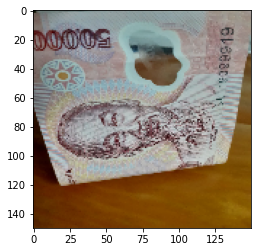

In [28]:
img = load_img('/content/50.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_tien.predict(img)
class_tien=['100K','10K','200K','20K','500K','50K']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là tờ:", class_tien[a])